<a href="https://colab.research.google.com/github/Samuel-RR/CursoDeExtensaoPythonPandas/blob/main/Segundo_exemplo_em_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando biblioteca pandas no Python
import pandas as pd

In [ ]:
combustiveis_df = pd.read_excel("ca-2021-02.xlsx")
display(combustiveis_df.head())

In [ ]:
#Inserção simples de dado
combustiveis_df['Ativo'] = True

display(combustiveis_df.head())

In [ ]:
#E se eu quiser uma coluna nova chamada "OBS"
# E que preencha automaticamente "MELHOR CIDADE"
# quando o Municipio for FEIRA DE SANTANA, BA...
#combustiveis_df['OBS'] = "MELHOR CIDADE" if combustiveis_df['Municipio'] == "FEIRA DE SANTANA" else ""
# Criar uma coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna Municipio for igual a SAO PAULO
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else None for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

In [ ]:
# (por Leandro Rodrigues)
# como preencher uma coluna 'Valor de Venda - Status' que verifica o seguinte:
# se o valor de venda for maior que 6,5 reais, ele fala que tá Caro..caso contrário, está barato
import numpy as np

combustiveis_df['Status do Valor de Venda'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Status do Valor de Venda']])

In [ ]:
# Calcular postos de gasolina por habitante temos na amostragem de 
# combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
display(num_habitantes_df)

In [ ]:
# Calcular postos de gasolina por habitante temos na amostragem de 
# combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)

In [ ]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

In [ ]:
#Destruir coluna completamente vazia (todas as linhas são nulas)
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

In [ ]:
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 
         'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
         'Unidade de Medida', 'Bandeira', 'Ativo', 'Status do Valor de Venda']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

In [ ]:
# Remover a linhas duplicadas
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

In [ ]:
#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['HabitantePorPosto'] =  postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos']
#display(postos_por_municipio_df.info())
display(postos_por_municipio_df.round(2))

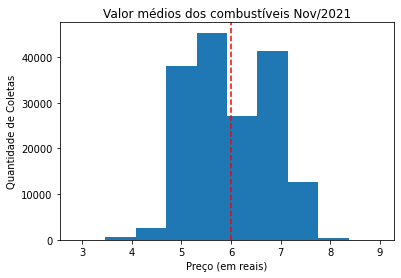

In [30]:
import matplotlib.pyplot as plt
plt.hist(combustiveis_df['Valor de Venda'])

plt.title("Valor médios dos combustíveis Nov/2021")

plt.xlabel("Preço (em reais)")

plt.ylabel("Quantidade de Coletas")

plt.axvline(combustiveis_df['Valor de Venda'].mean(), color='red', linestyle='dashed', linewidth=1.5)

In [31]:
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

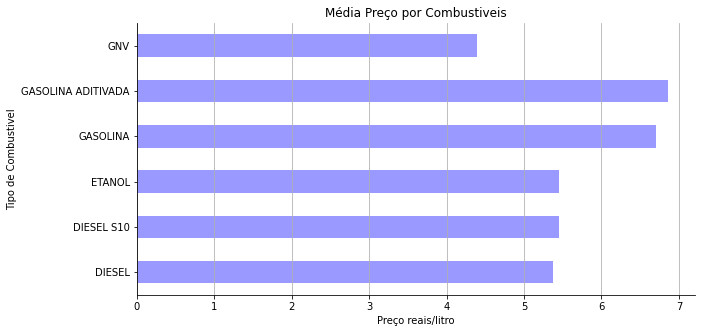

In [49]:
import seaborn as sns

plt.figure(figsize=(10, 5))

c_mean_grafico = c_mean.plot(
    kind="barh",
    title= "Média Preço por Combustiveis",
    xlabel="Tipo de Combustivel",
    ylabel="Preço reais/litro",
    color="blue",
    alpha = 0.4,
)

c_mean_grafico.set_ylabel("Tipo de Combustivel")
c_mean_grafico.set_xlabel("Preço reais/litro")

plt.grid(axis="x")

sns.despine()

plt.show()


In [50]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

In [52]:
#c_mean.reset_index(inplace=True)
display(c_mean)

excel ="por_litro.xlsx"
c_mean.to_excel(excel,"Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [57]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

wb = load_workbook(excel)


ws = wb['Sumário']


cinzinha = PatternFill("solid", fgColor="cccccc")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

MAX_ROW = ws.max_row
num_linha=2
while(num_linha <= ws.max_row):
  coord = 'B'+str(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color='FF0000')
  else:
    ws[coord].font = Font(color='00FF00')
  num_linha += 1
wb.save(excel)


